<a href="https://colab.research.google.com/github/natoo77/SocialMediaSentiment/blob/main/Social_media_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
import kagglehub
import os

# Download latest data version from kaggle
path = kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset")
print("Path to dataset files:", path)

file_path = os.path.join(path, 'sentimentdataset.csv')

data = pd.read_csv(file_path)


Path to dataset files: /root/.cache/kagglehub/datasets/kashishparmar02/social-media-sentiments-analysis-dataset/versions/3


In [9]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [13]:
data = data.iloc[:,2:]
data.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


`Feature	Description`

*   `Text`	User-generated content showcasing sentiments
*  `Sentiment`	Categorized emotions
*   `Timestamp`	Date and time information
*   `User`	Unique identifiers of users contributing
*   `Platform`	Social media platform where the content originated
*   `Hashtags'	Identifies trending topics and themes
*   `Likes`	Quantifies user engagement (likes)
*  `Retweets`	Reflects content popularity (retweets)
*   `Country`	Geographical origin of each post
*  `Year`	Year of the post
*   `Month`	Month of the post
*   `Day`	Day of the post
*  `Hour`	Hour of the post


In [53]:
print(f"Number of unique values of Sentiment column: {data['Sentiment'].nunique()}\n")

print(data['Sentiment'].unique())

Number of unique values of Sentiment column: 279

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety    

<Axes: ylabel='count'>

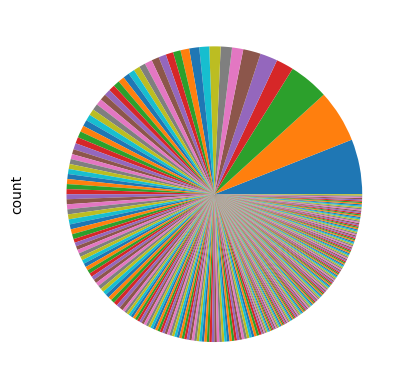

In [30]:
#Rozkład zmiennej sentyment
data['Sentiment'].value_counts().plot(kind='pie', labels=None)

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') #Compute sentiment labels


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}

In [48]:
sentiment_unique = data['Sentiment'].unique()
sentiment_values = []
for item in sentiment_unique:
  sentiment_value = SentimentIntensityAnalyzer().polarity_scores(item)
  sentiment_values.append(sentiment_value)


The *SentimentIntensityAnalyzer* produces a dictionary with four key metrics:

**neg**: Proportion of the text classified as negative.

**neu**: Proportion of the text classified as neutral.

**pos**: Proportion of the text classified as positive.

**compound**: A normalized score between -1 (most negative) and +1 (most positive). This is the overall sentiment score.

In [55]:
for i in range(len(sentiment_unique)):
    print(f"{sentiment_unique[i].strip()} -> {sentiment_values[i]}")

Positive -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
Negative -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
Neutral -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Anger -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
Fear -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4939}
Sadness -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}
Disgust -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}
Happiness -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
Joy -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
Love -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
Amusement -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
Enjoyment -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
Admiration -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5423}
Affection -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}
Awe -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

In [76]:
# Define the sentiment grouping function
def sentiment_grouping(score):
    if score >= 0.15:
        return 'Positive'
    elif score <= -0.15:
        return 'Negative'
    else:
        return 'Neutral'

# Initialize an empty dictionary to store grouped words
grouped_words = {'Positive': [], 'Negative': [], 'Neutral': []}

# Iterate over the data and group words
for i in range(len(sentiment_unique)):
    word = sentiment_unique[i].strip()  # Get the word
    score = sentiment_values[i]['compound']  # Get the sentiment score
    category = sentiment_grouping(score)  # Get the sentiment category
    grouped_words[category].append(word)  # Add the word to the appropriate group

# Print the grouped words
print(grouped_words['Positive'])
print(grouped_words['Negative'])
print(grouped_words['Neutral'])

['Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Surprise', 'Acceptance', 'Adoration', 'Calmness', 'Excitement', 'Kind', 'Pride', 'Excitement', 'Elation', 'Euphoria', 'Contentment', 'Gratitude', 'Hope', 'Compassion', 'Tenderness', 'Enthusiasm', 'Compassion', 'Elation', 'Acceptance', 'Determination', 'Contentment', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Inspired', 'Confident', 'Determination', 'Thrill', 'Calmness', 'Gratitude', 'Admiration', 'Overjoyed', 'Inspiration', 'Motivation', 'Amusement', 'Excitement', 'Satisfaction', 'Blessed', 'Appreciation', 'Confidence', 'Surprise', 'Optimism', 'Pride', 'Happiness', 'Elegance', 'Thrill', 'Harmony', 'Creativity', 'Radiance', 'Inspiration', 'Coziness', 'Gratitude', 'Adventure', 'Euphoria', 'Freedom', 'Harmony', 'Radiance', 'Inspiration', 'Euphoria', 'Spark', 'Gratitude', 'Marvel', 'Joy', 'Happiness', 'Enthusiasm', 'Gratitude', 'Positivity', 'Kindness', 'Friendship